# Inside the Decentralised Casino
This notebook describes the complete analytical process used in the 2020 PLOS One paper by Scholten, Zendle, and Walker.

In [1]:
import gamba as gb

In [2]:
import glob
osf_files = glob.glob('/home/ojs/Data/osf_data/*.csv')
osf_data = [gb.data.read_csv(f, ['bet_time','payout_time','duration']) for f in osf_files]
raw_data = gb.data.concat(osf_data)
gb.data.summarise_app(raw_data, dapp=True)

users: 24234
games: 5
num bets: 2232741
bet value: 2723287.7921361737
payout value: 2688008.036876773
start: 2018-08-04 04:27:21 6084746
end: 2020-03-09 19:32:55 9639151



In [11]:
providers = ['etheroll','fck','dice2win']
summary = gb.data.summarise_providers(raw_data, providers)
display(summary)

,etheroll,fck,dice2win
values,,,
Unique Users,3086,14466,7868
Games,1,4,4
Bet Value,420942,465196,1.26724e+06
Payout Value,419068,462137,1.24582e+06
Start Block,6084746,6859200,6287216
End Block,9638617,8071084,9639151
Start Time,2018-08-04 04:27:21,2018-12-10 06:05:13,2018-09-07 08:17:21
End Time,2020-03-09 17:35:39,2019-07-02 08:49:06,2020-03-09 19:32:55


etheroll
fck
dice2win


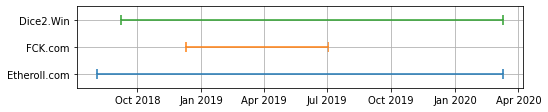

In [12]:
provider_labels = ['Etheroll.com','FCK.com','Dice2.Win']
plot = gb.data.plot_provider_dates(raw_data, providers, provider_labels = provider_labels)
plot.savefig('provider_timeline.pdf', bbox_inches='tight')

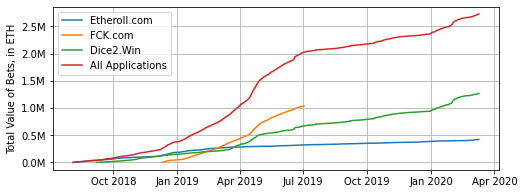

In [4]:
plot = gb.data.plot_provider_bets(raw_data, providers, provider_labels = provider_labels)

In [5]:
measures = gb.measures.calculate_labrie_measures(raw_data, filename='measures_table.csv', daily=False)

100%|██████████| 24234/24234 [44:42<00:00,  9.03it/s] 


,player_id,duration,frequency,num_bets,mean_bets_per_day,mean_bet_size,total_wagered,net_loss,percent_loss
0,af0dae46c70a4f458155877378f65fa33fa076a4af40f9...,2,100.000000,5,2.50,0.380000,1.900000,-1.826054,-96.108105
1,4a4e60fa218e6bc84d06631044ac0d49fa325094ae20fa...,7,100.000000,7,1.00,0.098490,0.689427,0.297347,43.129579
2,bed1e116412f7634c4fb7f5e351f744485a774946108a3...,8,87.500000,7,1.00,0.100000,0.700000,-0.084160,-12.022857
3,a20d873dd67769a05476b3af1e8c0ab6a83aa9d3005ba8...,1,100.000000,2,2.00,0.075000,0.150000,0.150000,100.000000
4,48e984ceedf0fb9391e6e05bf300b01fd0f23ae5729cb6...,3,100.000000,3,1.00,0.099586,0.298757,0.298757,100.000000
...,...,...,...,...,...,...,...,...,...
24229,a7e8a95e02d2bb206804b579aa8788076f676ce90e8abb...,7,100.000000,7,1.00,0.100000,0.700000,-0.280200,-40.028571
24230,7de118f8819961ccaadf3eb15febd167e4ef3b1b329230...,1,100.000000,6,6.00,0.010000,0.060000,0.027128,45.212963
24231,35b769af65c4f27107180e0d9bd6a077bef9a569c71ae8...,1,100.000000,7,7.00,0.110000,0.770000,0.047054,6.110944
24232,41496167917a10746b78b291b18f95695f19ca4e0bc7c6...,7,100.000000,7,1.00,0.100000,0.700000,-0.084160,-12.022857


In [6]:
measures = gb.data.read_csv('measures_table.csv')

game_players = []
for provider in ['dice2win','fck']:
    for game in ['coinflip','onedice','twodice','roll']:
        game_bets = raw_data[(raw_data['provider']==provider) & (raw_data['game_type']==game)]
        game_player_ids = list(set(game_bets['player_id'].values))
        game_players.append(game_player_ids)
game_players.append(list(set(raw_data[raw_data['provider']=='etheroll']['player_id'].values)))
        
game_measures = []
for players in game_players:
    game_measures.append(measures[measures['player_id'].isin(players)])

labels = ['d2w_f','d2w_d','d2w_2d','d2w_r','fck_f','fck_d','fck_2d','fck_r','eroll']
matrix = gb.statistics.calculate_walker_matrix(game_measures, labels, measure='duration')
display(matrix)

,d2w_f,d2w_d,d2w_2d,d2w_r,fck_f,fck_d,fck_2d,fck_r,eroll
d2w_f,-,,,,,,,,
d2w_d,0.16,-,,,,,,,
d2w_2d,0.24**,0.1,-,,,,,,
d2w_r,0.17,0.03,0.08,-,,,,,
fck_f,0.55**,0.39**,0.46**,0.39**,-,,,,
fck_d,0.22**,0.08**,0.05,0.05,0.43**,-,,,
fck_2d,0.4**,0.25**,0.16**,0.23**,0.59**,0.2**,-,,
fck_r,0.34**,0.19**,0.1**,0.17**,0.54**,0.13**,0.07,-,
eroll,0.09,0.12,0.19**,0.11,0.49**,0.14**,0.34**,0.27**,-


In [7]:
# human players are non-fck_flip players
human_df = measures[~measures['player_id'].isin(game_players[4])]
print(len(human_df), human_df['num_bets'].sum())

10357 1743478


In [8]:
table = gb.data.add_tables(gb.statistics.descriptive_table(human_df, extended=True), gb.statistics.ks_test(human_df))
spearman_coefficient_table = gb.statistics.spearmans_r(human_df)
other95, top5 = gb.labelling.get_labelled_groups(gb.labelling.top_split(human_df, 'total_wagered'), 'top_total_wagered')
print(len(top5), len(other95))
comparison_table = gb.data.add_tables(gb.statistics.descriptive_table(top5, extended=True), gb.statistics.descriptive_table(other95, extended=True))

518 9839


In [9]:
display(table, spearman_coefficient_table, comparison_table)

,mean,std,median,iqr,K-S Score,p
duration,29.694699,80.644753,1.000000,10.000000,0.841345,0.0
frequency,76.381680,36.449799,100.000000,50.000000,0.965805,0.0
num_bets,168.338129,991.975872,11.000000,62.000000,0.841345,0.0
mean_bets_per_day,23.126172,47.871529,6.000000,21.000000,0.841345,0.0
mean_bet_size,1.152438,11.810984,0.112500,0.353214,0.503989,0.0
total_wagered,213.769934,2451.851990,1.400000,16.590000,0.503989,0.0
net_loss,2.910579,49.863671,0.040600,0.711497,0.212654,0.0
percent_loss,10.913490,112.137087,5.326948,51.991304,0.548102,0.0


,duration,frequency,num_bets,mean_bets_per_day,mean_bet_size,total_wagered,net_loss,percent_loss
duration,-,,,,,,,
frequency,-0.89**,-,,,,,,
num_bets,0.63**,-0.45**,-,,,,,
mean_bets_per_day,0.35**,-0.19**,0.93**,-,,,,
mean_bet_size,0.16**,-0.1**,0.26**,0.24**,-,,,
total_wagered,0.53**,-0.37**,0.84**,0.78**,0.72**,-,,
net_loss,0.12**,-0.1**,0.15**,0.14**,0.15**,0.2**,-,
percent_loss,-0.1**,0.06**,-0.15**,-0.12**,-0.07**,-0.14**,0.67**,-


,mean,std,median,iqr,mean,std,median,iqr
duration,95.559846,138.374884,35.000000,120.000000,26.227056,74.828675,1.000000,7.000000
frequency,55.033356,35.142903,50.000000,78.348808,77.505618,36.171533,100.000000,50.000000
num_bets,1787.716216,3951.361181,644.000000,1660.000000,83.081716,264.545582,9.000000,47.000000
mean_bets_per_day,90.583674,95.033778,68.022222,77.056618,19.574695,41.055106,5.000000,17.690476
mean_bet_size,13.766592,50.530921,1.840872,5.613258,0.488333,1.960136,0.102000,0.279428
total_wagered,3874.377290,10306.802712,986.389465,1759.015000,21.047644,53.573782,1.100000,10.890000
net_loss,38.077269,216.264481,10.302300,102.597139,1.059136,9.534907,0.038662,0.599504
percent_loss,0.947262,9.047723,0.902867,7.598299,11.438188,115.008765,6.555556,57.555601
top_total_wagered,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
gb.statistics.ks_test(other95)

,K-S Score,p
duration,0.841345,0.0
frequency,0.965062,0.0
num_bets,0.841345,0.0
mean_bets_per_day,0.841345,0.0
mean_bet_size,0.503989,0.0
total_wagered,0.503989,0.0
net_loss,0.221843,0.0
percent_loss,0.558688,0.0
top_total_wagered,0.500000,0.0
